# Stencil Interpretation
We can interpret a stencil, say, a symmetric 5-point stencil $A = [a, b, c, b, a]$, as a differential oprator approximation, by using the Taylor expansion

$$ u(x + \delta h) = u(x) + \delta h u'(x) + \frac12 \delta^2 h^2 u''(x) + \frac16 \delta^3 h^3 u'''(x) + O(h^4)\,. $$

For the stencil,
\begin{equation}
\begin{split}
(A u)(x) &=& \, a (u(x - 2h) + u(x + 2h)) + b (u(x - h) + u(x + h)) + c u(x) \\
         &=& \, (c + 2 a + 2 b) u(x) + (4 a + b) h^2 u''(x) + O(h^4) \\
         &=& \, (4 a + b) h^2 \left(u''(x) + \frac{c + 2 a + 2 b}{4 a + b} \frac{1}{h^2} u(x) +  O(h^2) \right)\,.
\end{split}
\end{equation}

Thus, the stencil is $(\geq 2)$th-order approximation to $const \cdot h^2 (\partial_{xx} + k^2) u(x)$, where

$$ k h = \left( \frac{c + 2 a + 2 b}{4 a + b} \right)^{\frac12} \,. $$

### Finite-difference approximations to $\partial{xx} + k^2$
* 3-point, 2nd order: $[0, 1, -2 + (kh)^2, 1, 0]$.
* 5-point, 4th order: $[-.083, 1.33, -2.5 + (kh)^2, 1.33, -0.083]$.

## Karsten's Stencils - Effective $kh$
Note: Karsten uses $-\partial_{xx} - k^2$.

In [89]:
import helmholtz as hm
import matplotlib.pyplot as plt
import numpy as np

def effective_kh(a, b, c):
    return ((c + 2 * a + 2 * b) / (4 * a + b)) ** 0.5

In [91]:
karsten_stencil = [
    [ 0.083, -1.333,  2.226],  # R = [1, 1]
    [-0.042, -0.239,  0.197],  # R = [1, 1]
    [-0.092, -0.403, -0.495],  # R = [1, -1]
    [ 0.007,  0.160,  0.168],  # R = [1, -1]
    [-0.029, -0.153, -0.181],  # No R, but test R=[1, -1] if relaxation is slow.
]

for level, (a, b, c) in enumerate(karsten_stencil):
    print("Level {} effective kh {:.3f}".format(level, effective_kh(a, b, c)))

Level 0 effective kh 0.523
Level 1 effective kh 0.947
Level 2 effective kh 1.388
Level 3 effective kh 1.634
Level 4 effective kh 1.423


Level 1 has a $9\%$ error in the value of the "exact" value $2 k h$, where $k h$ is the level 0 value.

## Very Coarse Levels - When does operator turn definite?
The 3-point stencil becomes diagonal-dominant and positive-definite when $kh$ crosses $2$: $-2 + (k h)^2 = 2$, $A = [1, 2, 1]$. For the 5-point stencil, this occurs at a higher $kh \approx 2.31$.

In [81]:
n = 96
kh_values = np.linspace(0, 2.5, 101)
discretization_values = ("3-point", "5-point")
fraction_nonnegative_eigenvalues = dict(
    (discretization, 
     np.array([
         len(np.where(np.linalg.eig(hm.linalg.helmholtz_1d_discrete_operator(kh, discretization, n).todense())[0] >= 0)[0]) / n
         for kh in kh_values])
    ) for discretization in discretization_values)

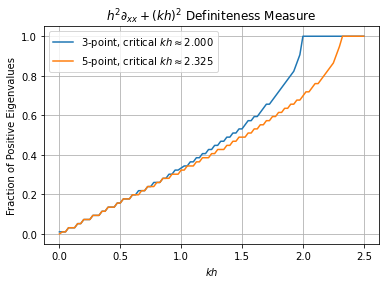

In [94]:
fig, axs = plt.subplots(1, 1, figsize=(6, 4))

ax = axs #axs[0]
for discretization in discretization_values:
    ax.plot(kh_values, fraction_nonnegative_eigenvalues[discretization], 
            label="{}, critical $kh \\approx {:.3f}$".format(
                discretization, kh_values[min(np.where(fraction_nonnegative_eigenvalues[discretization] > .99)[0])]))
ax.set_title("$h^2 \partial_{xx} + (kh)^2$ Definiteness Measure")
ax.set_xlabel("$kh$")
ax.set_ylabel("Fraction of Positive Eigenvalues")
ax.grid()
ax.legend();